### Data Exploration Objectives
1. To use summary statistics and visualizations to find clues about the tendencies of the data and understand it's quality
2. Formulate assumptions and the hypothesis of our analysis
3. Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,9) 
plt.rcParams['axes.titlesize'] = 'large'

In [2]:
## Import dataframe
data = pd.read_csv('cleaned_data.csv', index_col=False)
data.head(5)

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
## Dropping unneccessary data column
data.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
## Begin implementing descriptive statistic methods
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
## Show a positive (right) or negative (left) skew - values closer to zero show less skew
data.skew()

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_27536\727167154.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [6]:
## Only non-numeric data column
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
## Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

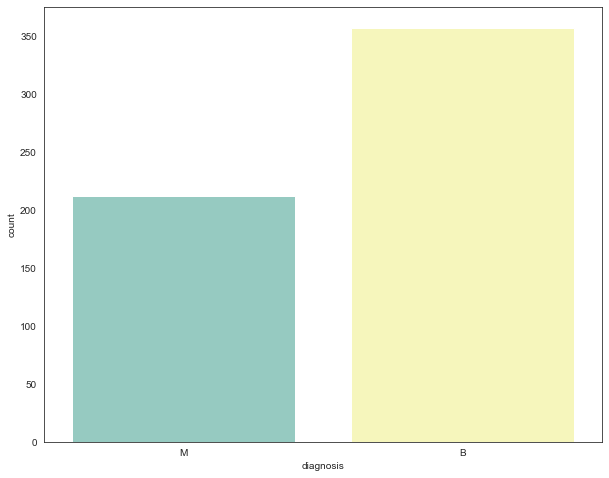

In [8]:
## Plotting the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [9]:
## Add diagnosis column back and divide columns into groups (mean, se, worst)
data_diag=data.loc[:,["diagnosis"]]

from scipy.stats import norm

data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:22]
data_worst=data.iloc[:,23:]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')
Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


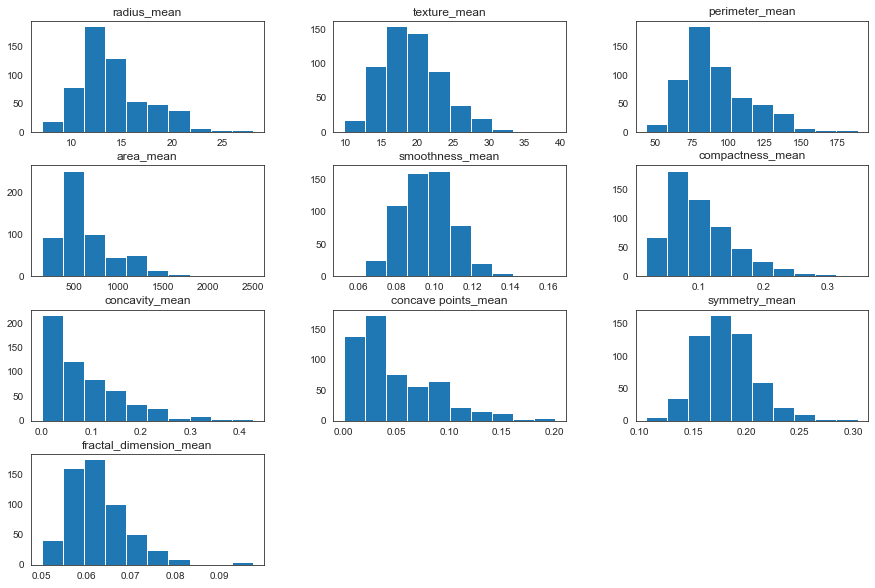

In [10]:
## Plot histogram of mean data variables
hist_mean = data_mean.hist(bins=10, figsize=(15,10), grid=False)

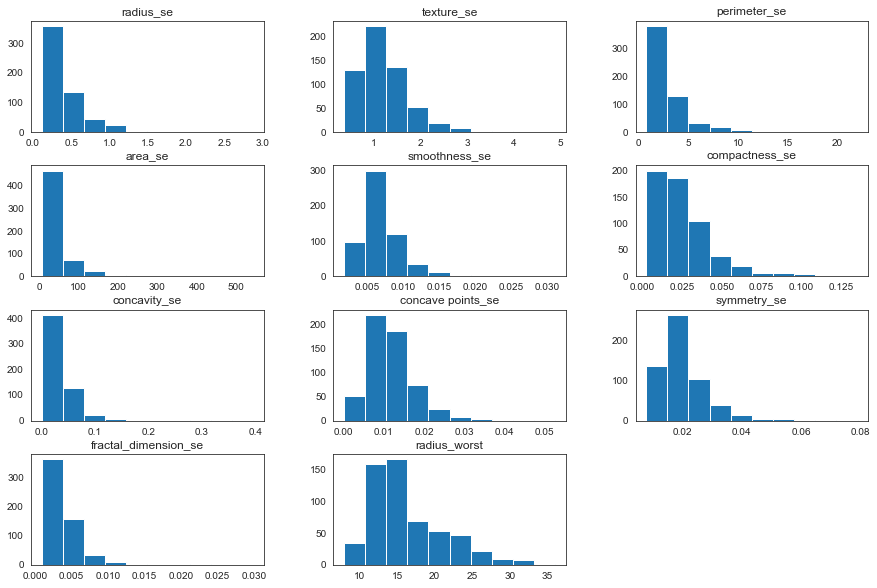

In [11]:
## Plot histogram of se data variables
hist_se = data_se.hist(bins=10, figsize=(15,10), grid=False)

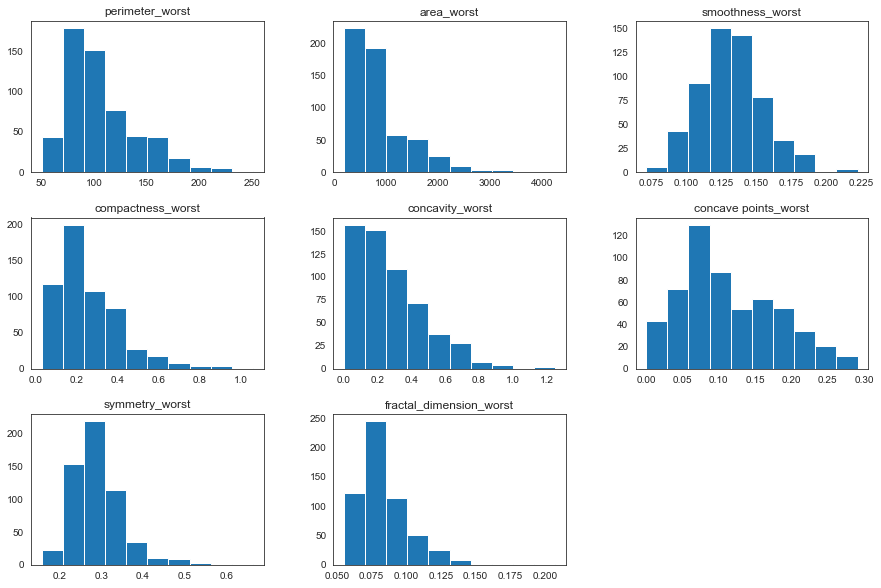

In [12]:
## Plot histogram of worst data variables
hist_worst = data_worst.hist(bins=10, figsize=(15,10), grid=False)

#### Observation

    The *concavity* and *concavity_point* may have an exponential distribution (a right-skewed continuous probability distribution that models variables in which small values occur more frequently than higher values)
    The *texture*, *smooth* and *symmetry* attributes look to have a Gaussian or nearly Gaussian distribution (Interesting as many ML techniques assume a Gaussian univariate distribution on the input variables)

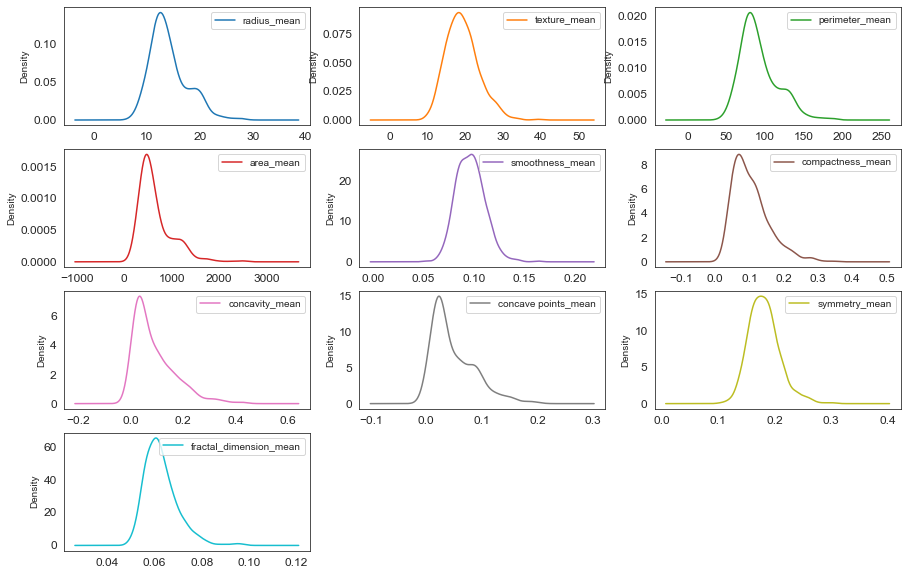

In [18]:
## Create density plots of _mean suffix

plt = data_mean.plot(kind='density', subplots=True, layout=(4,3), 
                     sharex=False, sharey=False, fontsize=12, figsize=(15,10))

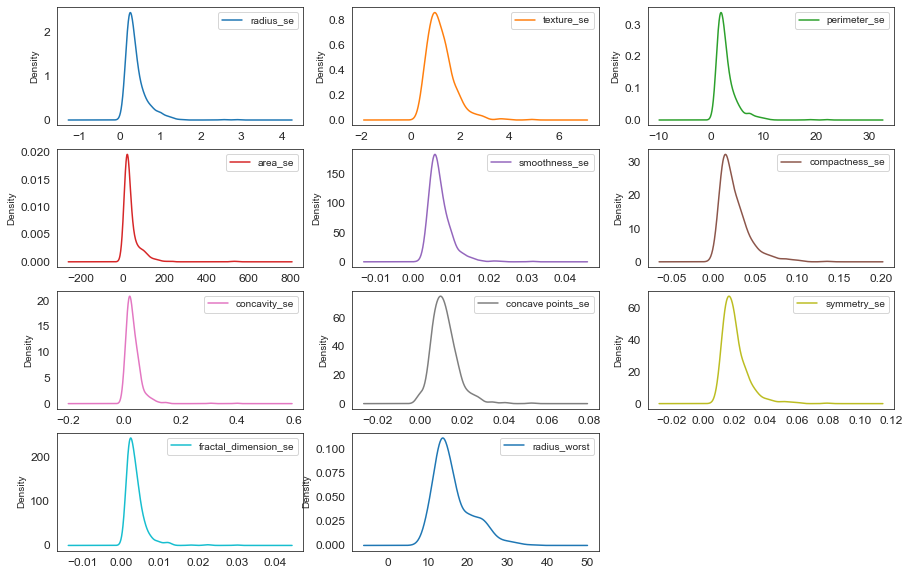

In [19]:
## Create density plots of _se suffix

plt = data_se.plot(kind='density', subplots=True, layout=(4,3), 
                     sharex=False, sharey=False, fontsize=12, figsize=(15,10))

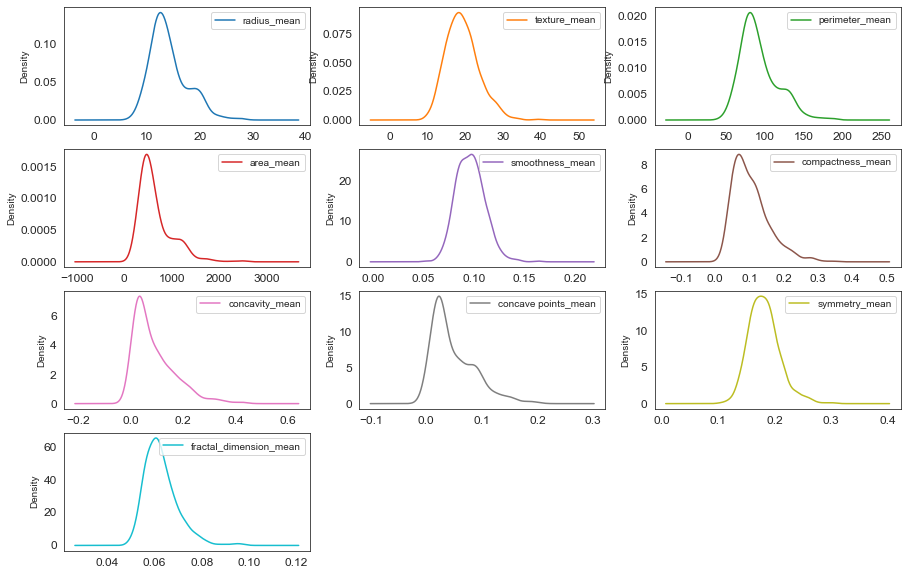

In [20]:
## Create density plots of _worst suffix

plt = data_mean.plot(kind='kde', subplots=True, layout=(4,3), 
                     sharex=False, sharey=False, fontsize=12, figsize=(15,10))

#### Correlation Matrix

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_27536\4069898651.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

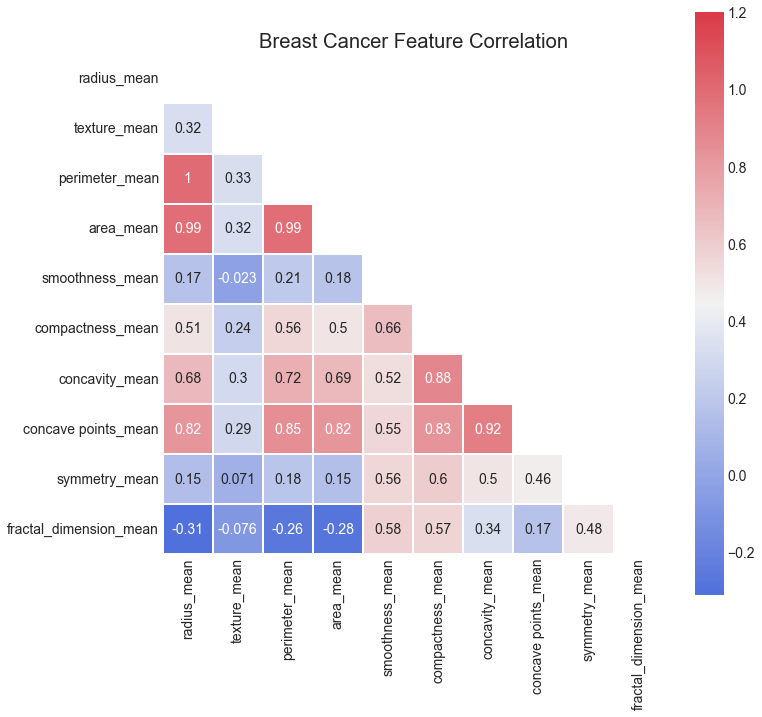

In [22]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('cleaned_data.csv', index_col=False)
data.drop('Unnamed: 0', axis=1, inplace=True)
## Compute the correlation matrix
corr = data_mean.corr()

## Generate a correlation mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
data, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

## Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

#### Observations: 
1. Strong positive relationships exist with mean value parameters between 0.75 - 1
2. Some parameters are moderately positive correlated between 0.5 - 0.75 (concavity and area, concavity and perimeter etc.)
3. We can see some strong negative correlations between fractal_dimension with radius, texture, parameter mean values

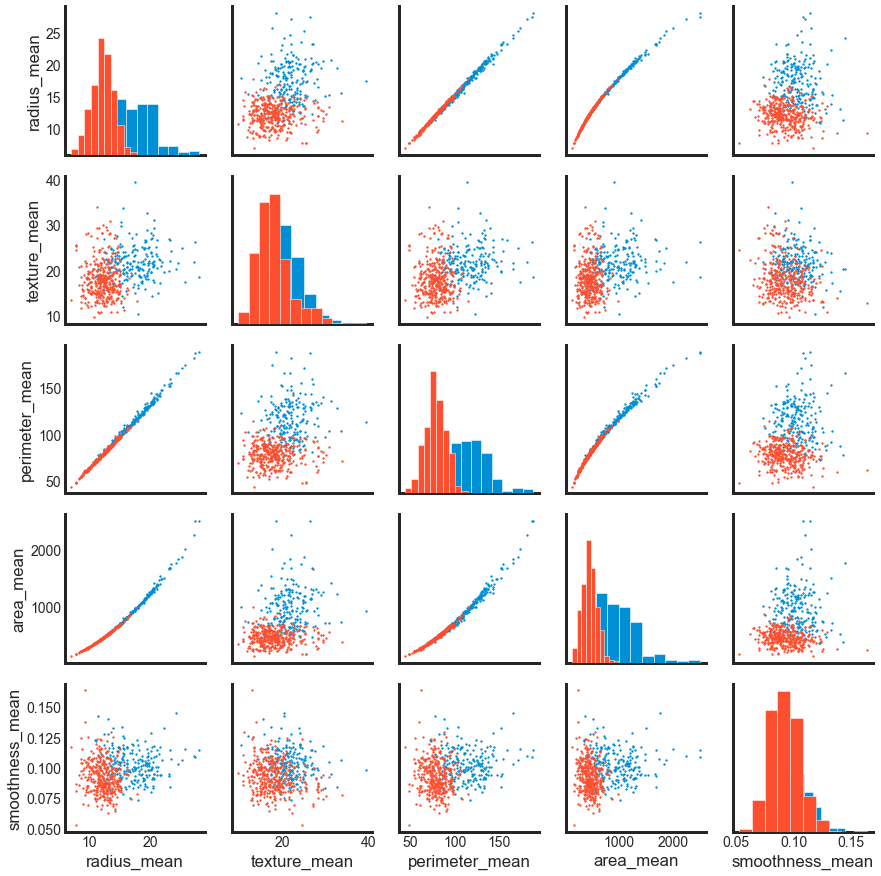

In [23]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('cleaned_data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

#### Summary

1. Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer detection. Larger values of these parameters tends to show a correlation with malignant tumours.
2. Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. 
3. In any of the histograms there are no noticeable large outliers that warrants further cleanup. 